In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

/Users/itdeveloper/opt/anaconda3/envs/training/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

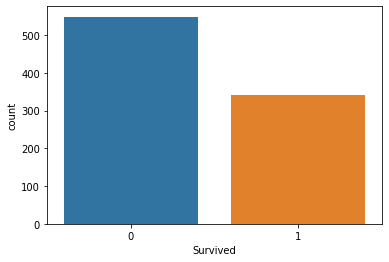

In [18]:
sns.countplot(train['Survived'])

### Pclass

In [19]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/Users/itdeveloper/opt/anaconda3/envs/training/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

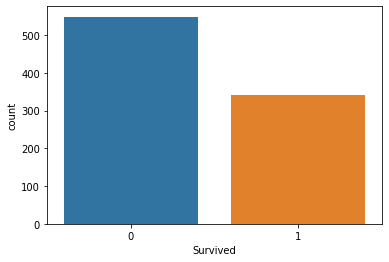

In [20]:
sns.countplot(train['Survived'])

#### Name

/Users/itdeveloper/opt/anaconda3/envs/training/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

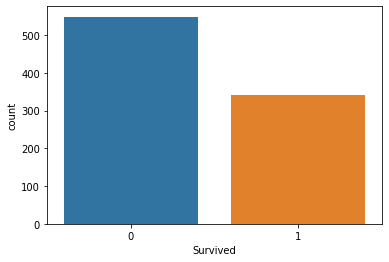

In [21]:
sns.countplot(train['Survived'])

#### Pertama, kita dapat memperoleh informasi yang berguna tentang gelar penumpang. Melihat distribusi judul, mungkin berguna untuk mengelompokkan nilai berukuran lebih kecil ke dalam grup 'lainnya', meskipun pada akhirnya saya memilih untuk tidak melakukan ini.

In [22]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Title, dtype: int64

#### harapan yang relatif tinggi untuk variabel baru di buat ini, karena tingkat kelangsungan hidup tampaknya secara signifikan di atas atau di bawah tingkat kelangsungan hidup rata-rata, yang seharusnya membantu model kami.

In [23]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

##### Melihat hubungan antara panjang nama dan tingkat kelangsungan hidup tampaknya menunjukkan bahwa memang ada hubungan yang jelas. Apa artinya ini? Apakah orang dengan nama yang lebih panjang lebih penting, dan dengan demikian lebih mungkin diprioritaskan dalam kecelakaan kapal?

In [24]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [25]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

#### Variable Sex
##### "Perempuan dan anak-anak dulu," kata pepatah terkenal. Jadi, kita harus mengharapkan perempuan untuk memiliki tingkat kelangsungan hidup yang lebih tinggi daripada laki-laki, dan memang demikian. Kami berharap variabel ini sangat berguna dalam model kami.


In [26]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [27]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

#### Age
##### Ada 177 null untuk Age, dan mereka memiliki tingkat kelangsungan hidup 10% lebih rendah daripada non-nulls. Sebelum memasukkan nilai untuk null, kami akan menyertakan tanda Age_null hanya untuk memastikan kami dapat menjelaskan karakteristik data ini.

In [28]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

##### pada pandangan pertama, hubungan antara usia dan kelangsungan hidup tempaknya sangat kuat. Tapi, bukan berarti bahwa variable akan menjadi prediktor yang buruk; pada tingak yang lebih dalam dari pohon keputusan tertentu, hubungan diskriminatif mungkin terbuka.

In [29]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [30]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

### SibSp
##### Pada pandangan pertama, saya tidak terlalu yakin akan pentingnya variabel ini. Distribusi dan tingkat kelangsungan hidup antara kategori yang berbeda tidak memberi saya banyak harapan.

In [31]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [32]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

### Parch
##### Kesimpulan yang sama seperti Sibsp: penumpang tanpa orang tua atau anak-anak memiliki kemungkinan bertahan hidup yang lebih rendah daripada yang lain, tetapi tingkat kelangsungan hidup itu hanya sedikit lebih rendah dari tingkat kelangsungan hidup populasi secara keseluruhan.

In [33]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [34]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

##### Ketika kita memiliki dua prediktor yang tampaknya lemah, satu hal yang dapat kita lakukan adalah menggabungkannya untuk mendapatkan prediktor yang lebih kuat. Dalam kasus SibSp dan Parch, kita dapat menggabungkan dua variabel untuk mendapatkan metrik 'ukuran keluarga', yang mungkin (dan memang demikian) terbukti menjadi prediktor yang lebih baik daripada dua variabel awal.

### Ticket
##### Kolom Tiket tampaknya berisi nilai alfanumerik unik, dan karenanya tidak terlalu berguna untuk dirinya sendiri. Namun, kami mungkin dapat mengekstrak kekuatan prediksi darinya.

In [35]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

##### Salah satu informasi yang berpotensi berguna adalah jumlah karakter di kolom Tiket. Ini bisa menjadi cerminan dari 'jenis' tiket yang dimiliki penumpang tertentu, yang entah bagaimana bisa menunjukkan peluang mereka untuk bertahan hidup. Satu teori (yang sebenarnya dapat diverifikasi) adalah bahwa beberapa karakteristik tiket dapat menunjukkan lokasi kamar penumpang, yang mungkin menjadi faktor penting dalam rute pelarian mereka, dan akibatnya kelangsungan hidup mereka.

In [36]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [37]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

##### Informasi lain adalah huruf pertama dari setiap tiket, yang, sekali lagi, mungkin menunjukkan atribut tertentu dari pemegang tiket atau kamar mereka.

In [38]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [39]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [40]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

#### Fare / Trif
##### di sini adalah hubungan yang jelas antara Fare dan Survived, dan saya menduga bahwa hubungan ini mirip dengan Class dan Survived.

In [41]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [42]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

##### Melihat hubungan antara Kelas dan Tarif,  terlihat hubungan yang jelas.

In [43]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


#### Cabin
##### kolom ini memiliki nol paling banyak (hampir 700), tetapi kami masih dapat mengekstrak informasi darinya, seperti huruf pertama setiap kabin, atau nomor kabin. Kegunaan kolom ini mungkin mirip dengan variabel Tiket.

#### Cabin Letter
##### Kita dapat melihat bahwa sebagian besar huruf kabin dikaitkan dengan tingkat kelangsungan hidup yang tinggi, jadi ini mungkin merupakan variabel yang berguna. Karena tidak banyak nilai unik, kami tidak akan melakukan pengelompokan apa pun di sini, meskipun beberapa nilai memiliki jumlah kecil.

In [44]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [45]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [46]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

#### Cabin Number
##### Pada pandangan pertama, ini tampaknya tidak berguna. Kami tidak hanya memiliki ~700 nol yang akan sulit untuk diperhitungkan, tetapi korelasi dengan Bertahan hampir nol. Namun, jumlah kabin secara keseluruhan tampaknya memiliki tingkat kelangsungan hidup yang tinggi dibandingkan dengan rata-rata populasi, jadi kami mungkin ingin menyimpannya untuk berjaga-jaga untuk saat ini.

In [47]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [48]:
pd.qcut(train['Cabin_num'],3).value_counts()

(1.999, 28.667]     67
(65.667, 148.0]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [49]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [50]:
train['Survived'].corr(train['Cabin_num'])

-0.06384595922789371

### Embarked / Berangkat
#### Sepertinya orang-orang Cherbourg memiliki tingkat kelangsungan hidup 20% lebih tinggi daripada lokasi keberangkatan lainnya. Hal ini sangat mungkin terjadi karena tingginya kehadiran penumpang kelas atas dari lokasi tersebut.

In [51]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [53]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

/Users/itdeveloper/opt/anaconda3/envs/training/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

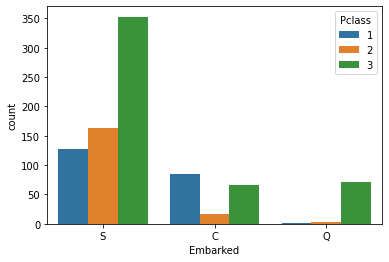

In [54]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

### Feature Engineering
#### Setelah melakukan eksplorasi sepintas tentang variabel, sekarang kami memiliki ide yang cukup bagus tentang bagaimana kami ingin mengubah variabel  kedalam persiapan untuk kumpulan dataset akhir. Kami akan melakukan rekayasa fitur melalui serangkaian fungsi pembantu yang masing-masing melayani tujuan tertentu.

#### Fungsi pertama ini membuat dua kolom terpisah: kolom numerik yang menunjukkan panjang kolom Nama penumpang, dan kolom kategoris yang mengekstrak gelar penumpang.

In [55]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

### Selanjutnya, hitung nilai nol dari kolom Usia dengan mengisi nilai rata-rata dari judul dan kelas penumpang yang sesuai. Pendekatan yang lebih terperinci untuk imputasi ini harus lebih akurat daripada hanya mengambil rata-rata usia populasi.

Next, we impute the null values of the Age column by filling in the mean value of the passenger's corresponding title and class. This more granular approach to imputation should be more accurate than merely taking the mean age of the population.

In [56]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

#### menggabungkan kolom SibSp dan Parch menjadi variabel baru yang menunjukkan ukuran keluarga, dan mengelompokkan variabel ukuran keluarga ke dalam tiga kategori.

In [57]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

#### Kolom Tiket digunakan untuk membuat dua kolom baru: Ticket_Lett, yang menunjukkan huruf pertama dari setiap tiket (dengan nilai n yang lebih kecil dikelompokkan berdasarkan tingkat kelangsungan hidup); dan Ticket_Len, yang menunjukkan panjang bidang Tiket.

In [58]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

#### dua fungsi berikut mengekstrak huruf pertama kolom Kabin dan nomornya, masing-masing.

In [59]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [60]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

#### Isi nilai nol di kolom Embarked dengan nilai yang paling sering muncul, yaitu 'S.'

In [61]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

#### Isi satu nilai Fare/Traif yang hilang di set pengujian dengan nilai rata-rata Fare dari set pelatihan (transformasi data set uji harus selalu fit menggunakan data pelatihan).

In [62]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

#### Selanjutnya, karena kita menggunakan scikit-learn, kita harus mengubah kolom kategoris menjadi variabel dummy. Fungsi berikut melakukan ini, dan kemudian menghapus kolom kategoris asli. Ini juga memastikan bahwa setiap kategori ada dalam set data pelatihan dan pengujian.

In [63]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

#### Fungsi pembantu terakhir membuang kolom apa pun yang belum dibuang. Dalam kasus kami, hanya perlu menghapus kolom PassengerId, yang kami putuskan tidak berguna untuk masalah kami (omong-omong, saya telah mengonfirmasi ini dengan tes terpisah). Perhatikan bahwa membuang kolom PassengerId di sini berarti bahwa kita harus memuatnya nanti saat membuat file pengiriman.

In [64]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

#### Setelah membangun fungsi pembantu, sekarang dapat menjalankan mereka untuk membangun dataset yang akan digunakan dalam model:a

In [65]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

#### Kita dapat melihat bahwa dataset akhir kita memiliki 45 kolom, terdiri dari kolom target dan 44 variabel prediktor. Meskipun kumpulan data yang sangat berdimensi dapat menghasilkan varians yang tinggi, saya pikir kita harus baik-baik saja di sini.

In [67]:
print(len(train.columns))

45


### Model Estimation and Evaluation

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [69]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
12,Sex_female,0.111215
11,Sex_male,0.109769
33,Name_Title_Mr.,0.109746
1,Fare,0.088209
2,Name_Len,0.087904
0,Age,0.078651
8,Pclass_3,0.043268
35,Name_Title_Miss.,0.031292
7,Ticket_Len,0.031079
34,Name_Title_Mrs.,0.028852


In [71]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv(os.path.join('test.csv'))
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('y_test15.csv', sep=",", index = False)